# Overfitting demo

## Criando um conjunto de dados baseado em uma função senoidal 

In [0]:
import math
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
%matplotlib inline

Vamos considerar um conjunto de dados sintéticos de 30 pontos amostrados de uma função senoidal $y = \sin(4x)$:

In [0]:
def f(x):
    return np.sin(np.multiply(4,x))

Abaixo criamos valores aleatéorios para $x$ no intervalo [0,1)

In [0]:
random.seed(98103)
n = 300 # quantidade de valores gerados
x = np.array([random.random() for _ in range(n)])  #em cada iteração gera um valor aleatório entre 0 e 1
x=np.sort(x) # ordena os valores em ordem crescente
#transforma o array em uma matrix com uma n linhas e 1 coluna (vetor coluna)
X = x[:,np.newaxis] 

Calcula $y$ como uma função de $x$. $y$ é chamada variável independente pois depende de $x$

In [0]:
Y = f(x)

Adiciona ruído Gaussiano aleatório à $y$

In [0]:
random.seed(1)
#ruído é amostrado de uma distribuição normal com média 0 e desvio padrão 1/3
e = np.array([random.gauss(0,1.0/3.0) for i in range(n)]) 
Y = Y

### Funções auxiliares

Função para plotar os dados (scatter plot)

In [0]:
def plot_data(X,Y):    
    plt.plot(X,Y,'k.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([0,1,-1.5,2])

Função para imprimir coeficientes

In [0]:
def print_coefficients(model):    
    # Retorna o grau do polinômio
    deg = len(model.steps[1][1].coef_)-1
    # Obtém os parâmetros estimados
    w = list(model.steps[1][1].coef_) #model.steps é usado pois o modelo é calculado usando make_pipile do scikit learn
    # Numpy tem uma função para imprimir o polinômio mas os parâmetros precisam estar na ordem inversa
    print ('Polinômio estimado para grau ' + str(deg) + ':')
    w.reverse()
    print (np.poly1d(w)+model.steps[1][1].intercept_)

Função para calcular uma regressão polinomial para qualquer grau usando scikit learn.

In [0]:
def polynomial_regression(X,Y,deg):
    model = make_pipeline(PolynomialFeatures(deg),LinearRegression()) 
    model.fit(X,Y)
    return model

Função para plotar o modelo por meio de suas predições

In [0]:
def print_poly_predictions(X,Y, model):
    plot_data(X,Y)
    x_plot = np.array([i/200.0 for i in range(200)])
    X_plot = x_plot[:,np.newaxis]
    y_pred = model.predict(X_plot)
    plt.plot(x_plot,y_pred,'g-')
    plt.axis([0,1,-1.5,2])

In [0]:
def plot_residuals_vs_fit(X,Y, model):
#    plot_data(X,Y)
#    x_plot = np.array([i/200.0 for i in range(200)])
#    X_plot = x_plot[:,np.newaxis]
    y_pred = model.predict(X)
    res = Y - y_pred
    plt.plot(y_pred,res,'k.',color='blue',)
    plt.axhline(y=0., color='r', linestyle='-')
    plt.xlabel("predictions")
    plt.ylabel("residuals")

### Função verdadeira

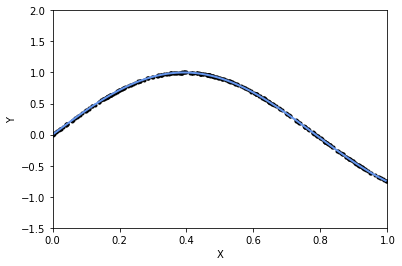

In [11]:
plot_data(X,Y)
x_plot = np.array([i/200.0 for i in range(200)])
y_plot = f(x_plot)
plt.plot(x_plot,y_plot,color='cornflowerblue',linewidth=2)

## KNN vs Linear Regression 

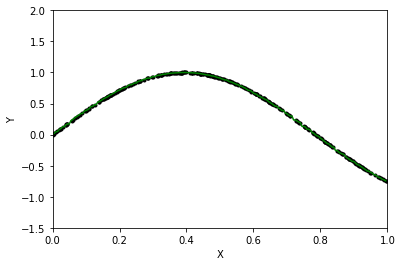

In [12]:
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X, Y) 
print_poly_predictions(X,Y, neigh)

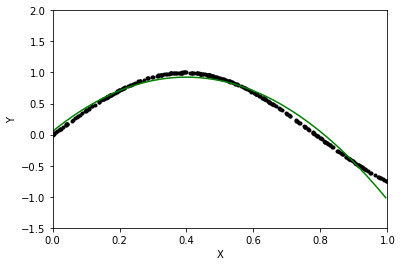

In [13]:
model = polynomial_regression(X,Y,2)
print_poly_predictions(X,Y,model) 

## Regressão polinomial de diferentes graus

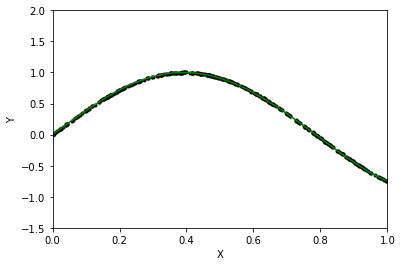

In [14]:
model = polynomial_regression(X,Y,5)
print_poly_predictions(X,Y,model)    

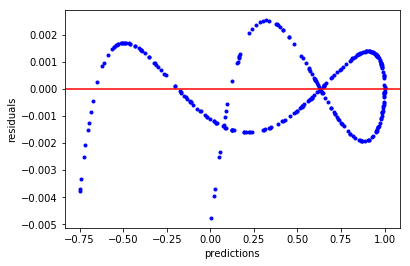

In [15]:
plot_residuals_vs_fit(X,Y,model)

Mostrando o modelo e coeficientes.

In [16]:
print_coefficients(model)

Polinômio estimado para grau 5:
        5         4         3         2
-3.134 x + 15.89 x - 19.54 x + 2.245 x + 3.778 x + 0.004781


# Regressão Ridge

A regressão ridge se propõe a evitar o overfitting adicionando um custo ao RSS (dos mínimos quadrados) que depende da norma L2 dos coeficientes $\|w\|$ (ou seja da magnitude dos coeficientes).  O resultado é a penalização de ajustes com coeficientes muito grandes.  A força dessa penalidade é controlada por um parâmetro lambda (aqui chamado "L2_penalty").

Função para estimar a regressão ridge para qualquer grau de polinômio:

In [0]:
def polynomial_ridge_regression(X,Y, deg, l2_penalty):
    model = make_pipeline(PolynomialFeatures(deg),Ridge(alpha=l2_penalty)) 
    model.fit(X,Y)
    return model

## Ridge com grau 16 usando uma penalidade *muito* pequena

In [18]:
model = polynomial_ridge_regression(X,Y,deg=16,l2_penalty=1e-14)
print_coefficients(model)

Polinômio estimado para grau 16:
        16          15         14       13         12          11
0.1193 x  - 0.7699 x  + 2.183 x  - 3.4 x  + 2.636 x  + 0.5206 x 
          10         9         8          7          6        5
 - 4.273 x  + 6.383 x - 4.425 x - 0.9446 x - 0.8204 x + 8.73 x
           4         3             2
 - 0.0307 x - 10.66 x - 0.0001466 x + 4 x - 1.391e-08


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19951e-17): result may not be accurate.
  overwrite_a=True).T


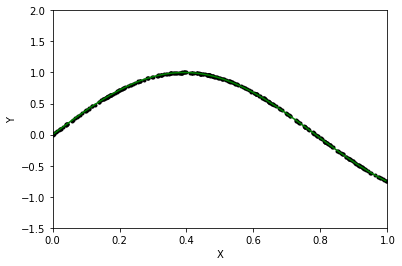

In [19]:
print_poly_predictions(X,Y,model)    

## Ridge com grau 16 usando uma penalidade *muito* grande

In [20]:
model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=1000)
print_coefficients(model)

Polinômio estimado para grau 16:
          16           15           14           13           12
-0.01328 x  - 0.01404 x  - 0.01488 x  - 0.01581 x  - 0.01686 x 
            11           10           9           8           7
 - 0.01803 x  - 0.01934 x  - 0.02081 x - 0.02246 x - 0.02429 x
            6           5           4           3           2
 - 0.02627 x - 0.02833 x - 0.03021 x - 0.03127 x - 0.02985 x - 0.0216 x + 0.4869


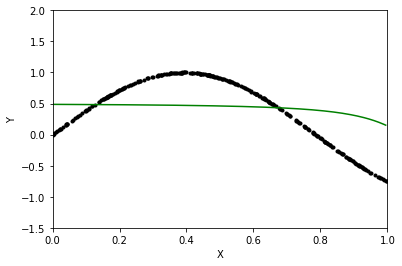

In [21]:
print_poly_predictions(X,Y,model)    

## Sequência de ajustes para uma sequência crescente de valores de lambda

lambda = 1.00e-10
Polinômio estimado para grau 16:
         16          15           14          13          12
-0.2916 x  + 0.6331 x  + 0.08141 x  - 0.5846 x  - 0.5158 x 
           11         10          9         8        7         6
 + 0.3136 x  + 1.055 x  + 0.5235 x - 1.478 x - 2.62 x + 1.016 x
         5          4         3          2
 + 7.36 x + 0.5223 x - 10.78 x + 0.0128 x + 3.999 x + 5.878e-06


lambda = 1.00e-08
Polinômio estimado para grau 16:
        16          15          14           13          12          11
0.4309 x  - 0.4417 x  - 0.5296 x  - 0.07592 x  + 0.5237 x  + 0.8002 x 
           10          9         8         7         6         5
 + 0.3896 x  - 0.6802 x - 1.688 x - 1.229 x + 1.754 x + 5.249 x
          4         3           2
 + 1.827 x - 11.14 x + 0.05792 x + 3.997 x + 2.628e-05


lambda = 1.00e-06
Polinômio estimado para grau 16:
         16          15          14          13          12          11
-0.3675 x  - 0.1209 x  + 0.2576 x  + 0.5513 x  + 0.56

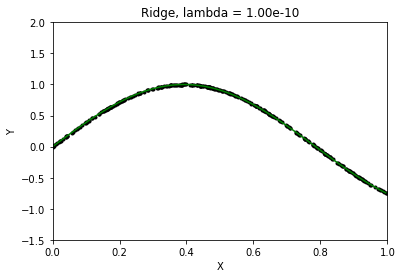

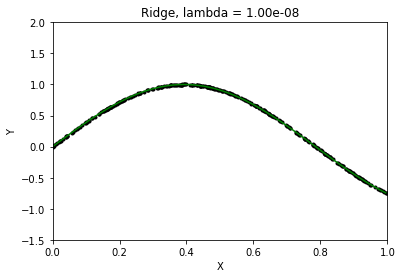

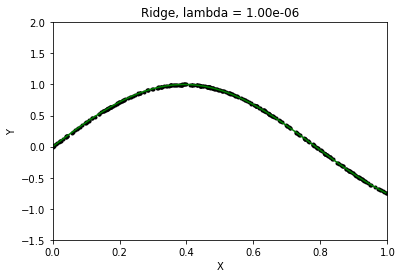

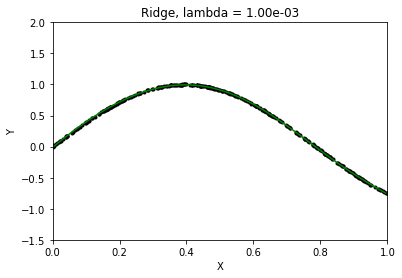

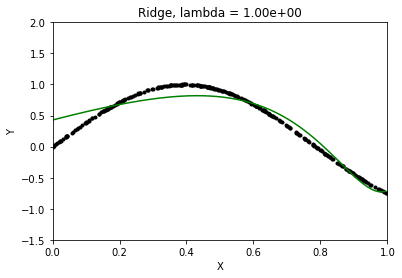

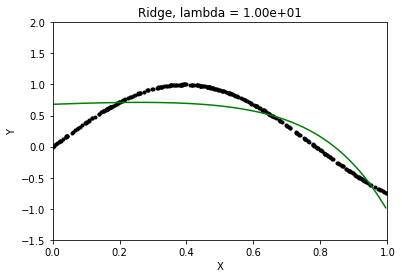

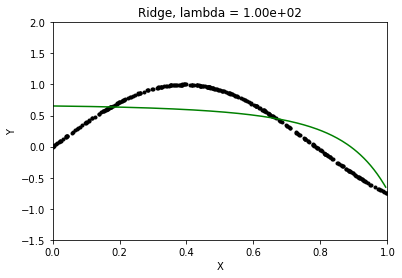

In [22]:
for l2_penalty in [1e-10, 1e-8, 1e-6, 1e-3, 1, 1e1, 1e2]:
    model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=l2_penalty)
    print('lambda = %.2e' % l2_penalty)
    print_coefficients(model)
    print('\n')
    plt.figure()
    print_poly_predictions(X,Y,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

## Usando validação cruzada para encontrar o melhor lembda para Regressão Ridge

A função abaixo calcula os rmses (root mean squared error) para um certo modelo considerando todos os k folds (parâmetro cv na função cross_val_score do scikit learn).

In [0]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv=10))
    return (rmse)

Cria um modelo de regressão ridge

In [0]:
model_ridge = Ridge()

Plota resultados (médias de rmse) para cada valor de alpha (ou lambda) 

Text(0, 0.5, 'rmse')

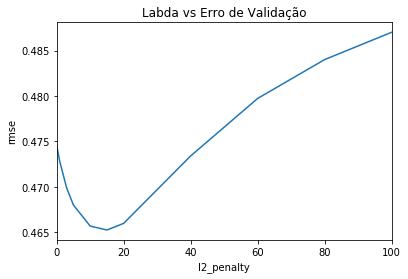

In [25]:
l2_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
cv_ridge = [rmse_cv(Ridge(alpha=l2_penalty)).mean() 
            for l2_penalty in l2_penalties]
cv_ridge = pd.Series(cv_ridge,index=l2_penalties)
cv_ridge.plot(title="Labda vs Erro de Validação")
plt.xlabel("l2_penalty")
plt.ylabel("rmse")

In [26]:
best_l2_penalty=cv_ridge.argmin()
best_rmse = cv_ridge.min()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


In [27]:
print (best_l2_penalty, best_rmse) #melhor valor de (alpha,rmse) encontrado

15.0 0.46525661385576866


In [28]:
model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

Polinômio estimado para grau 16:
         16             15           14           13           12
0.01079 x  + 0.0006572 x  - 0.01122 x  - 0.02518 x  - 0.04158 x 
            11           10          9          8          7          6
 - 0.06088 x  - 0.08354 x  - 0.1101 x - 0.1408 x - 0.1758 x - 0.2139 x
           5          4          3          2
 - 0.2517 x - 0.2797 x - 0.2745 x - 0.1811 x + 0.09995 x + 0.6981


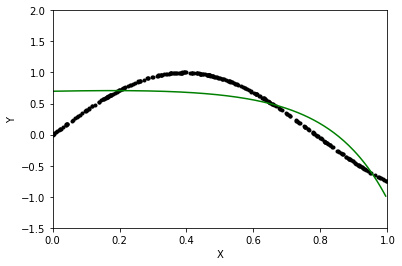

In [29]:
print_poly_predictions(X,Y,model)

# Regressão Lasso

A regressão Lasso, ao mesmo tempo, encolhe a magnitude dos coeficientes para evitar o overfitting e realiza implicitamente seleção de característcas igualando alguns atributos a zero (para lambdas, aqui chamados "L1_penalty", suficientemente grandes). Em particular, o Lasso adiciona ao RSS o custo $\|w\|$.

Função que estima a regressão polinomial de qualquer grau com a regressão Lasso.

In [0]:
def polynomial_lasso_regression(X,Y, deg, l1_penalty):
    model = make_pipeline(PolynomialFeatures(deg),Lasso(alpha=l1_penalty,max_iter=10000)) 
    model.fit(X,Y)
    return model

## Explore a solução lasso solution como uma função de diferentes fatores de penalidade

Nos referimos ao fator de penalidade do lasso como "l1_penalty"

l1_penalty = 1.000000e-04
número de não zeros = 7
Polinômio estimado para grau 16:
           16          8          7          6         3         2
-0.005318 x  + 0.3864 x + 0.7615 x + 0.1554 x - 1.667 x - 5.135 x + 4.798 x - 0.01639


l1_penalty = 1.000000e-03
número de não zeros = 5
Polinômio estimado para grau 16:
        11          10         3           2
0.4049 x  + 0.7326 x  - 4.498 x - 0.06916 x + 2.51 x + 0.2083


l1_penalty = 1.000000e-02
número de não zeros = 2
Polinômio estimado para grau 16:
        4
-1.761 x + 0.1629 x + 0.6953


l1_penalty = 1.000000e-01
número de não zeros = 1
Polinômio estimado para grau 16:
         3
-0.3123 x + 0.5065


l1_penalty = 1.000000e+01
número de não zeros = 0
Polinômio estimado para grau 16:
 
0.4285




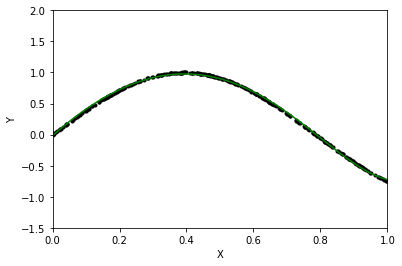

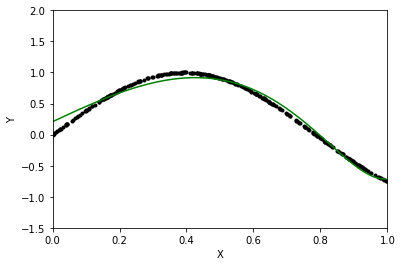

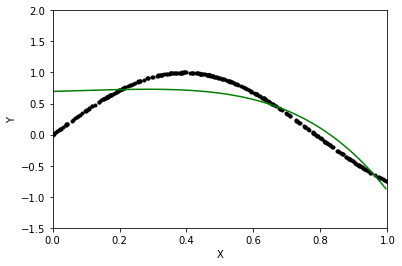

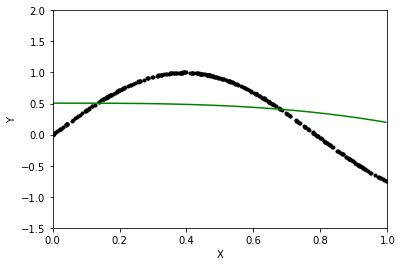

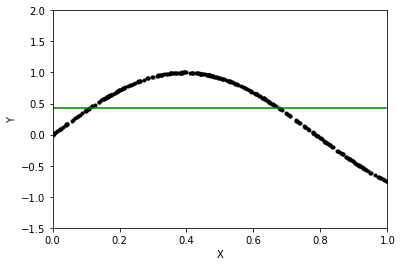

In [31]:
for l1_penalty in [0.0001, 0.001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(X,Y, deg=16, l1_penalty=l1_penalty)
    print ('l1_penalty = %e' % l1_penalty)
    w = list(model.steps[1][1].coef_)
    print ('número de não zeros = %d' % np.count_nonzero(w))
    print_coefficients(model)
    print ('\n')
    plt.figure()
    print_poly_predictions(X,Y,model)
    #plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % l1_penalty, np.count_nonzero(w))

Esse notebook foi inspirado nas aulas da especialização em Machine Learning da Universidade de Washington disponível no Coursera.